<a href="https://colab.research.google.com/github/adnan855570/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Required Libraries

In [ ]:

# !pip install pandas numpy matplotlib seaborn scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Load and Explore the Dataset

In [ ]:

# Read the dataset
df = pd.read_csv("/content/heart.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display the first few rows
df.head()


Dataset Shape: (918, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing (Encoding & Scaling)

In [ ]:
# Copy dataset for processing
data = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = data.drop(columns=["HeartDisease"])  # Features
y = data["HeartDisease"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing Completed!")


Preprocessing Completed!


# Train Machine Learning Models

In [ ]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}


# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

print("Model Training Completed!")


Model Training Completed!


# Evaluate Model Performance

In [ ]:
# Store results
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC Score": roc_auc,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]["Accuracy"] for m in results],
    "ROC AUC Score": [results[m]["ROC AUC Score"] for m in results]
})

# Display performance table
print("\nModel Performance:")
print(results_df)



Model Performance:
                    Model  Accuracy  ROC AUC Score
0           Decision Tree  0.788043       0.794089
1           Random Forest  0.880435       0.877170
2     K-Nearest Neighbors  0.847826       0.852773
3     Logistic Regression  0.847826       0.852773
4  Support Vector Machine  0.864130       0.863151


# Plot ROC Curve for Model Comparison

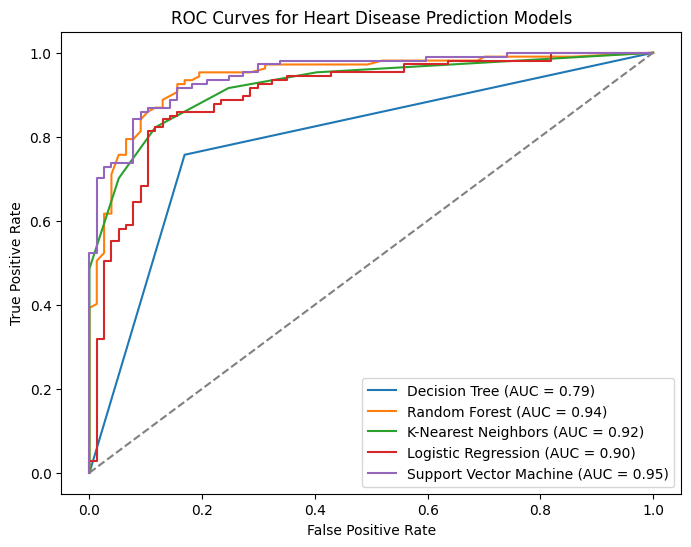

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Heart Disease Prediction Models")
plt.legend()
plt.show()


# Exploratory Data Analysis

## Distribution of Numericall Features

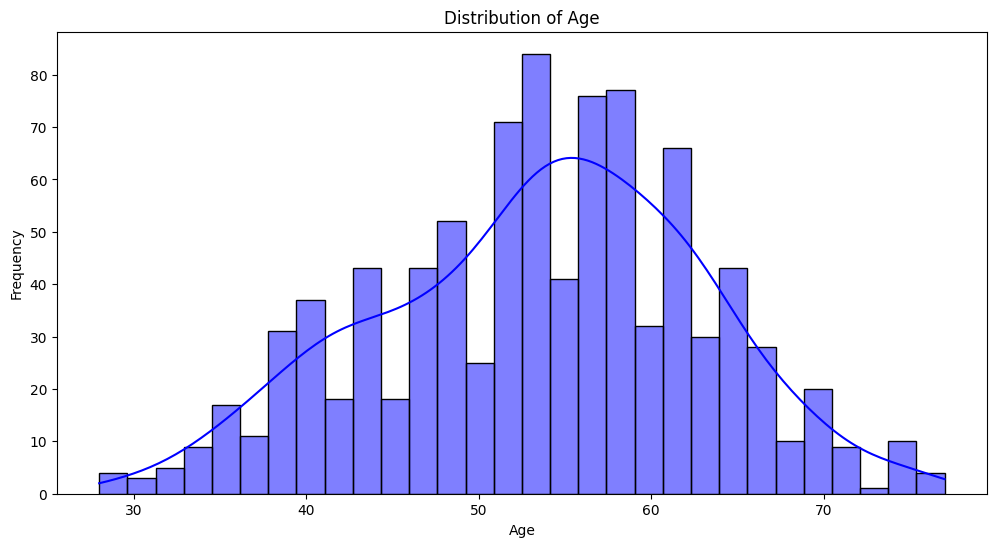

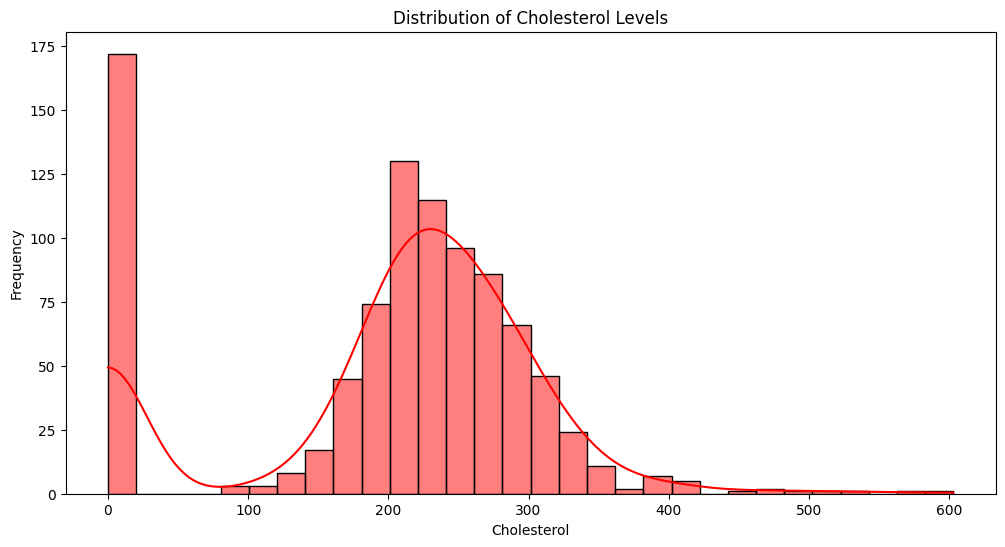

In [ ]:
import seaborn as sns

# Plot distribution of key numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='red')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

## Correlation Heat Map

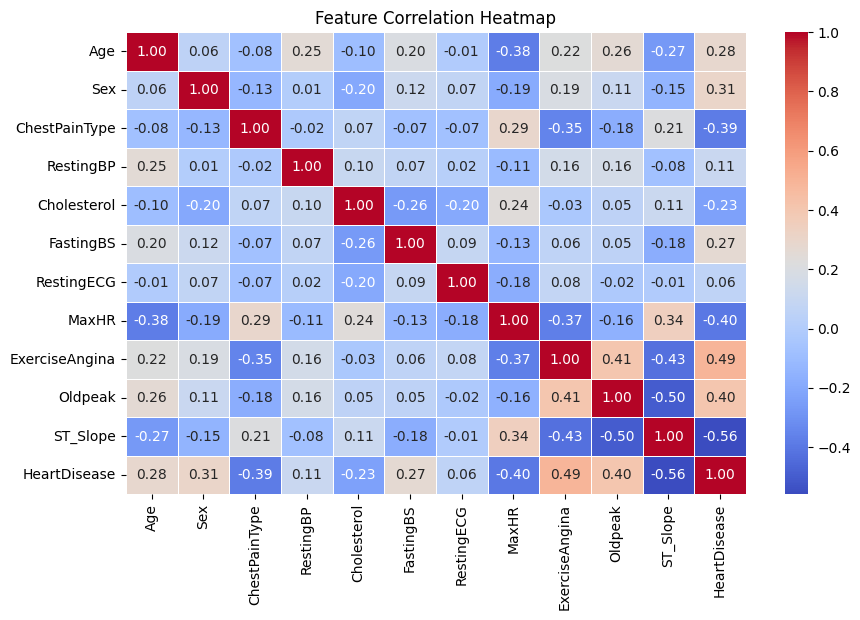

In [ ]:
# Convert categorical columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()  # Make a copy to avoid modifying the original data

categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for later decoding if needed

# Now, plot the correlation heatmap using the encoded dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature Importance Analysis (Using Random Forest)

<ipython-input-10-ed63a27efa2e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


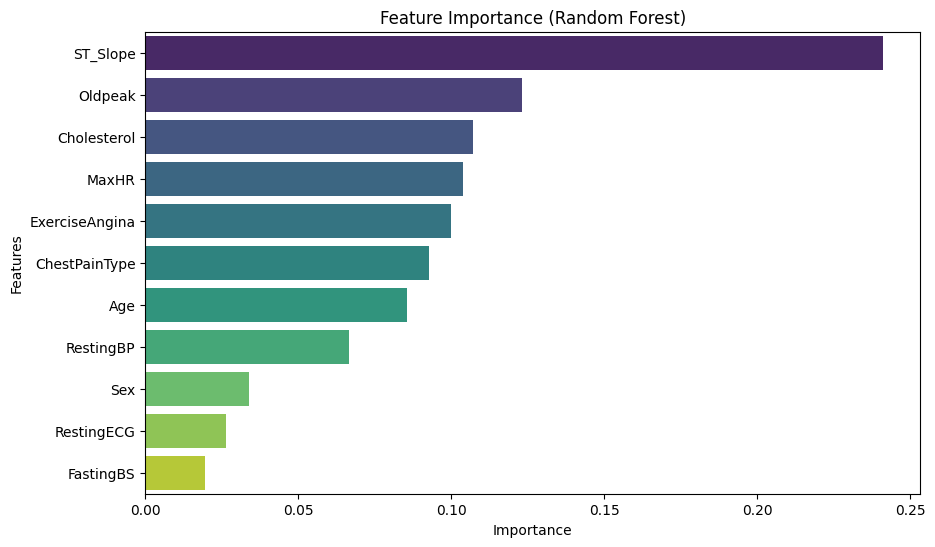

In [ ]:
feature_importances = models["Random Forest"].feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Hyperparameter Tuning for SVM & Random Forest (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and accuracy for RF
best_rf_params = grid_rf.best_params_
best_rf_accuracy = grid_rf.best_score_

# SVM Hyperparameter Tuning
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Best parameters and accuracy for SVM
best_svm_params = grid_svm.best_params_
best_svm_accuracy = grid_svm.best_score_

# Display the results
hyperparam_results_df = pd.DataFrame({
    "Model": ["Random Forest", "Support Vector Machine"],
    "Best Parameters": [best_rf_params, best_svm_params],
    "Best Accuracy (CV)": [best_rf_accuracy, best_svm_accuracy]
})




In [ ]:
# Print final remarks
print(f"Best Parameters for Random Forest: {best_rf_params}, Best Accuracy: {best_rf_accuracy:.4f}")
print(f"Best Parameters for SVM: {best_svm_params}, Best Accuracy: {best_svm_accuracy:.4f}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, Best Accuracy: 0.8747
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}, Best Accuracy: 0.8665
